# Lending Club Data Analysis(proposal)

#### import necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

#### using pd.read_csv function to load the csv file 

In [2]:
df=pd.read_csv('loan.csv')

/Users/sean/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


read the data and find interesting information

### Data Assesing

In [157]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

## Problems:
1. Too many attributes(columns):As we can see, there are over 70 columns/attributes. So I decided to keep only around 12 columns. In this way, we can make our analysis more productive and easier. I will pick the columns that I think are interesting. 
2. emp_title, emp_length, annual_inc, inq_fi and inq_last_12m have missing values
3. Some columns name are inappropriate
4. Many attributes have inappropriate data types
5. 'term' have redundant 'month', we can only keep the number and drop the word 'months'
6. 'inquries_lastyear' have negative values which are unreasonable

### Data Clean

Only pick interesting columns

In [159]:
newdf=df[['loan_amnt','funded_amnt','term','int_rate','grade','emp_title','emp_length','annual_inc','issue_d','loan_status','purpose','addr_state','inq_fi','inq_last_12m']]

In [160]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 14 columns):
loan_amnt       887379 non-null float64
funded_amnt     887379 non-null float64
term            887379 non-null object
int_rate        887379 non-null float64
grade           887379 non-null object
emp_title       835917 non-null object
emp_length      842554 non-null object
annual_inc      887375 non-null float64
issue_d         887379 non-null object
loan_status     887379 non-null object
purpose         887379 non-null object
addr_state      887379 non-null object
inq_fi          21372 non-null float64
inq_last_12m    21372 non-null float64
dtypes: float64(6), object(8)
memory usage: 94.8+ MB


In [161]:
newdf['emp_title'].value_counts()

Teacher                                    13469
Manager                                    11240
Registered Nurse                            5525
Owner                                       5376
RN                                          5355
Supervisor                                  4983
Sales                                       4212
Project Manager                             3988
Driver                                      3569
Office Manager                              3510
General Manager                             3178
Director                                    3156
manager                                     3138
teacher                                     2925
owner                                       2849
Engineer                                    2671
President                                   2598
driver                                      2429
Vice President                              2351
Attorney                                    2136
Operations Manager  

In [162]:
newdf['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [163]:
newdf['annual_inc'].value_counts()

60000.00     34281
50000.00     30575
65000.00     25498
70000.00     24121
40000.00     23943
80000.00     22729
45000.00     22699
75000.00     22435
55000.00     20755
90000.00     17159
100000.00    17131
85000.00     15648
35000.00     14868
30000.00     13764
120000.00    13202
52000.00     12174
42000.00     11705
48000.00     11330
110000.00    11090
72000.00      9656
95000.00      9274
150000.00     8136
62000.00      7770
36000.00      7700
38000.00      7208
125000.00     7006
32000.00      6774
54000.00      6627
58000.00      6621
56000.00      6557
             ...  
65032.00         1
65033.00         1
65035.00         1
65037.00         1
26260.00         1
65039.00         1
49275.22         1
65041.00         1
65045.00         1
101081.00        1
25270.00         1
25269.00         1
65052.00         1
15964.00         1
36895.02         1
65056.00         1
82999.92         1
73330.67         1
65062.00         1
101073.00        1
65065.00         1
101069.00   

### Plan:
There are several columns have missing values, I decided to do as follows
1. emp_title: I will set na value as 'other', there's already one row has 'other' value
2. emp_length: I will change the missing values as '< 1 year'
3. annual_inc: Change the NaN value as 0. 0 is not that strange as there are 2 rows whose 'annual_inc' is 0.
4. inq_fi and inq_last_12m also have NaN, but we can ignore them for now. because we only have 21372 rows who have these two attributes. we can not change the NaN to some other values without reasonable reson. 

In [164]:
newdf['emp_title'].fillna('other',inplace=True)
newdf['emp_length'].fillna('< 1 year',inplace=True)
newdf['annual_inc'].fillna(0,inplace=True)

/Users/sean/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Test

In [165]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 14 columns):
loan_amnt       887379 non-null float64
funded_amnt     887379 non-null float64
term            887379 non-null object
int_rate        887379 non-null float64
grade           887379 non-null object
emp_title       887379 non-null object
emp_length      887379 non-null object
annual_inc      887379 non-null float64
issue_d         887379 non-null object
loan_status     887379 non-null object
purpose         887379 non-null object
addr_state      887379 non-null object
inq_fi          21372 non-null float64
inq_last_12m    21372 non-null float64
dtypes: float64(6), object(8)
memory usage: 94.8+ MB


#### Data type and name
We also need to 
1. Change some columns data type to to make later analysis easier.
2. Change some column name to make the data more readable.

In [166]:
newdf.rename(columns={'loan_amnt':'loan_amount','funded_amnt':'funded_amount','issue_d':'issue_time','int_rate':'interest_rate','annual_inc':'annual_income','inq_fi':'inquries_fn','inq_last_12m':'inquries_lastyear'},inplace=True)

/Users/sean/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [167]:
newdf.head()

,loan_amount,funded_amount,term,interest_rate,grade,emp_title,emp_length,annual_income,issue_time,loan_status,purpose,addr_state,inquries_fn,inquries_lastyear
0,5000.0,5000.0,36 months,10.65,B,other,10+ years,24000.0,Dec-2011,Fully Paid,credit_card,AZ,NaN,NaN
1,2500.0,2500.0,60 months,15.27,C,Ryder,< 1 year,30000.0,Dec-2011,Charged Off,car,GA,NaN,NaN
2,2400.0,2400.0,36 months,15.96,C,other,10+ years,12252.0,Dec-2011,Fully Paid,small_business,IL,NaN,NaN
3,10000.0,10000.0,36 months,13.49,C,AIR RESOURCES BOARD,10+ years,49200.0,Dec-2011,Fully Paid,other,CA,NaN,NaN
4,3000.0,3000.0,60 months,12.69,B,University Medical Group,1 year,80000.0,Dec-2011,Current,other,OR,NaN,NaN


In [168]:
newdf['issue_time']= pd.to_datetime(newdf['issue_time'])
newdf['grade']=newdf['grade'].astype('category')
newdf['emp_length']=newdf['emp_length'].astype('category')
newdf['loan_status']=newdf['loan_status'].astype('category')
newdf['purpose']=newdf['purpose'].astype('category')
newdf['addr_state']=newdf['addr_state'].astype('category')

/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

#### Change the 'term' column, drope the 'months', then chage it as int type

In [169]:
newdf['term'] = newdf['term'].str.strip('months').astype(int)
newdf.rename(columns={'term':'term(month)'},inplace=True)

/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sean/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


#### Test

In [170]:
newdf.head()

,loan_amount,funded_amount,term(month),interest_rate,grade,emp_title,emp_length,annual_income,issue_time,loan_status,purpose,addr_state,inquries_fn,inquries_lastyear
0,5000.0,5000.0,36,10.65,B,other,10+ years,24000.0,2011-12-01,Fully Paid,credit_card,AZ,NaN,NaN
1,2500.0,2500.0,60,15.27,C,Ryder,< 1 year,30000.0,2011-12-01,Charged Off,car,GA,NaN,NaN
2,2400.0,2400.0,36,15.96,C,other,10+ years,12252.0,2011-12-01,Fully Paid,small_business,IL,NaN,NaN
3,10000.0,10000.0,36,13.49,C,AIR RESOURCES BOARD,10+ years,49200.0,2011-12-01,Fully Paid,other,CA,NaN,NaN
4,3000.0,3000.0,60,12.69,B,University Medical Group,1 year,80000.0,2011-12-01,Current,other,OR,NaN,NaN


### Change the abnormal value in 'inquries_lastyear'

In [171]:
newdf['inquries_lastyear']=newdf['inquries_lastyear'].replace(-4,0)

/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Add a new column 'year' to make later analysis easier

In [172]:
newdf['year']=newdf['issue_time'].dt.year.astype('category')

/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### save the cleaned data frame to new file

In [177]:
newdf.to_csv('loan_cleaned.csv',index=False)

### Statistics Summary

In [173]:
newdf.describe()

,loan_amount,funded_amount,term(month),interest_rate,annual_income,inquries_fn,inquries_lastyear
count,887379.000000,887379.000000,887379.000000,887379.000000,8.873790e+05,21372.000000,21372.000000
mean,14755.264605,14741.877625,43.201090,13.246740,7.502725e+04,0.943945,2.234091
std,8435.455601,8429.897657,10.998663,4.381867,6.469835e+04,1.446872,2.480242
min,500.000000,500.000000,36.000000,5.320000,0.000000e+00,0.000000,0.000000
25%,8000.000000,8000.000000,36.000000,9.990000,4.500000e+04,0.000000,0.000000
50%,13000.000000,13000.000000,36.000000,12.990000,6.500000e+04,0.000000,2.000000
75%,20000.000000,20000.000000,60.000000,16.200000,9.000000e+04,1.000000,3.000000
max,35000.000000,35000.000000,60.000000,28.990000,9.500000e+06,17.000000,32.000000


### Data Visualization

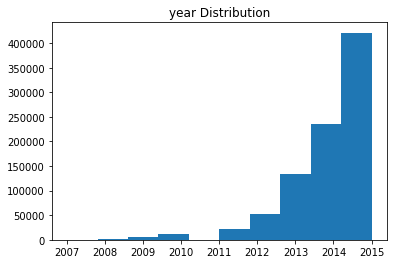

In [174]:
plt.hist(newdf['year']);
plt.title('year Distribution');

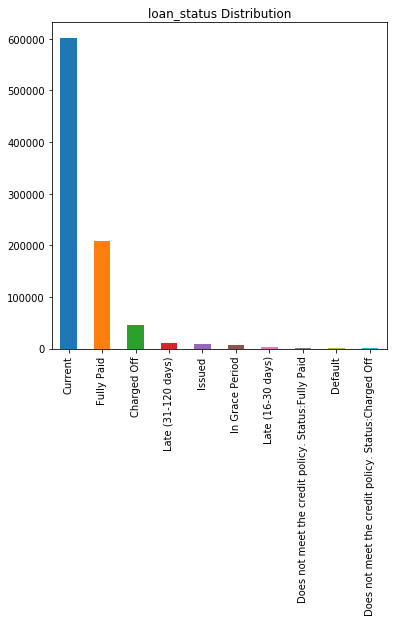

In [175]:
newdf['loan_status'].value_counts().plot(kind='bar',figsize=(6, 6))
plt.title('loan_status Distribution');

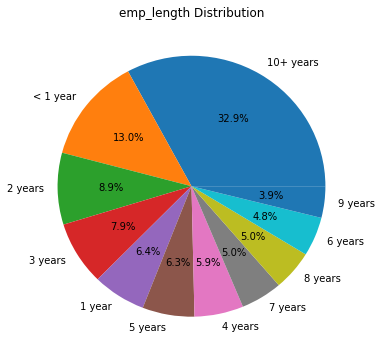

In [176]:
newdf['emp_length'].value_counts().plot(kind='pie',autopct='%.1f%%',figsize=(6, 6),label='');
plt.title('emp_length Distribution');